<a href="https://colab.research.google.com/github/rpasquini/defidata/blob/main/AAVE_Subgraph_request_Test_ETHUSD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import requests
# pretty print is used to print the output in the console in an easy to read format
from pprint import pprint


# function to use requests.post to make an API call to the subgraph url
def run_query(q):

    # endpoint where you are making the request
    request = requests.post('https://api.thegraph.com/subgraphs/name/aave/protocol-v2',
                            json={'query': query})
    if request.status_code == 200:
        return request.json()
    else:
        raise Exception('Query failed. return code is {}.      {}'.format(request.status_code, query))

In [39]:
# The Graph query - Query aave for a list of the last 10 flash loans by time stamp
query = """
{
usdEthPriceHistoryItems(skip:5000, first: 10) {
    id
		price
    timestamp
  	oracle {
  	  id
  	}
    }
  }
"""
result = run_query(query)

In [22]:
result

{'data': {'usdEthPriceHistoryItems': [{'id': '10163852137',
    'price': '4561066525110233',
    'timestamp': 1590797801,
    'oracle': {'id': '1'}},
   {'id': '10163852138',
    'price': '4561066525110233',
    'timestamp': 1590797801,
    'oracle': {'id': '1'}},
   {'id': '1016385558',
    'price': '4561066525110233',
    'timestamp': 1590797859,
    'oracle': {'id': '1'}},
   {'id': '10164592159',
    'price': '4553526706434133',
    'timestamp': 1590807788,
    'oracle': {'id': '1'}},
   {'id': '10164592171',
    'price': '4553526706434133',
    'timestamp': 1590807788,
    'oracle': {'id': '1'}},
   {'id': '10164592186',
    'price': '4553526706434133',
    'timestamp': 1590807788,
    'oracle': {'id': '1'}},
   {'id': '10164592190',
    'price': '4553526706434133',
    'timestamp': 1590807788,
    'oracle': {'id': '1'}},
   {'id': '10164592192',
    'price': '4553526706434133',
    'timestamp': 1590807788,
    'oracle': {'id': '1'}},
   {'id': '1016459546',
    'price': '45535267

In [37]:
from datetime import datetime

timestamp = 1651363200
dt_object = datetime.fromtimestamp(timestamp)
dt_object

datetime.datetime(2022, 5, 1, 0, 0)

Notar el uso de orderby y orderdirection 

In [42]:

query = """
{
  usdEthPriceHistoryItems(orderBy: timestamp, orderDirection: asc, where: {timestamp_gt:1651363200}) {
    id
    timestamp
    price
    oracle
    }
  }
"""
result = run_query(query)

In [56]:
import pandas as pd

In [92]:
df=pd.DataFrame.from_records(result['data']['usdEthPriceHistoryItems'])
df.head()

,id,timestamp,price
0,14688858113,1651366586,365278122762671
1,146891861,1651370833,361360449821487
2,1468923813,1651371533,361042313313689
3,1468956688,1651375816,361431907570866
4,1468984775,1651379432,360586483330625


In [120]:
df['datetime']=df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [93]:
df['ETHUSD']=1/(df['price'].astype(int)*1e-18)
df

,id,timestamp,price,ETHUSD
0,14688858113,1651366586,365278122762671,2737.640000
1,146891861,1651370833,361360449821487,2767.320000
2,1468923813,1651371533,361042313313689,2769.758455
3,1468956688,1651375816,361431907570866,2766.772880
4,1468984775,1651379432,360586483330625,2773.259804
...,...,...,...,...
95,1470138783,1651536311,349893195102195,2858.015000
96,1470156971,1651538970,351685694002021,2843.448048
97,1470161221,1651539430,352282413701711,2838.631624
98,14701881121,1651542930,351731422370369,2843.078373


In [77]:
10**(-18)

1e-18

In [127]:
df

,id,timestamp,price,ETHUSD,datetime
datetime,,,,,
2022-05-01 00:56:26,14688858113,1651366586,365278122762671,2737.640000,2022-05-01 00:56:26
2022-05-01 02:07:13,146891861,1651370833,361360449821487,2767.320000,2022-05-01 02:07:13
2022-05-01 02:18:53,1468923813,1651371533,361042313313689,2769.758455,2022-05-01 02:18:53
2022-05-01 03:30:16,1468956688,1651375816,361431907570866,2766.772880,2022-05-01 03:30:16
2022-05-01 04:30:32,1468984775,1651379432,360586483330625,2773.259804,2022-05-01 04:30:32
...,...,...,...,...,...
2022-05-03 00:05:11,1470138783,1651536311,349893195102195,2858.015000,2022-05-03 00:05:11
2022-05-03 00:49:30,1470156971,1651538970,351685694002021,2843.448048,2022-05-03 00:49:30
2022-05-03 00:57:10,1470161221,1651539430,352282413701711,2838.631624,2022-05-03 00:57:10


In [125]:
df.index=df.datetime

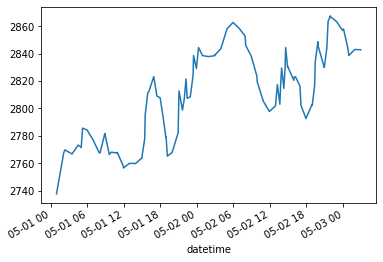

In [126]:
df.ETHUSD.plot()

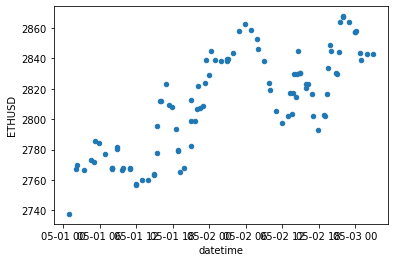

In [124]:
df.plot.scatter('datetime','ETHUSD')